# Импорты

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt

from dataset_creator.model.signals.signals import Signal
from dataset_creator.model.signals.frequencies_props import Spectrum, Spectrogram

# Функция отрисовки

In [35]:
def plot_signal_properties(signals, max_freq):
    n, m = len(signals), 2
    plt.figure(figsize=(m * 10, n * 10))
    for i, signal in enumerate(signals):
        gi = 1
        spectrum = Spectrum.build(signal)
        plt.subplot(n, m, i * m + gi)
        freq_mask = spectrum.frequencies <= max_freq
        plt.plot(spectrum.frequencies[freq_mask], spectrum.amplitudes[freq_mask])
        plt.title(f"Спектр сигнала {signal.name}")
        plt.ylabel('Амплитуда')
        plt.xlabel('Частота, Гц')
    
        gi = 2
        spectrogram = Spectrogram.build(signal)
        plt.subplot(n, m, i * m + gi)
        freq_mask = spectrogram.frequencies <= max_freq
        plt.pcolormesh(spectrogram.t, spectrogram.frequencies[freq_mask], spectrogram.amplitudes[freq_mask], shading='gouraud')
        plt.title(f"Спектрограмма сигнала {signal.name}")
        plt.ylabel('Частота, Гц')
        plt.xlabel('Время, с')
    plt.show()

# Исходные сигналы

In [20]:
signal_lin1 = Signal.load_from_csv(Path(r"..\data\raw\lin1.csv"))
signal_lin2 = Signal.load_from_csv(Path(r"..\data\raw\lin2.csv"))
signal_lin3 = Signal.load_from_csv(Path(r"..\data\raw\lin3.csv"))
signal_lin4 = Signal.load_from_csv(Path(r"..\data\raw\lin4.csv"))
signal_log1 = Signal.load_from_csv(Path(r"..\data\raw\log1.csv"))
signal_log2 = Signal.load_from_csv(Path(r"..\data\raw\log2.csv"))
signal_log3 = Signal.load_from_csv(Path(r"..\data\raw\log3.csv"))
signal_log4 = Signal.load_from_csv(Path(r"..\data\raw\log4.csv"))

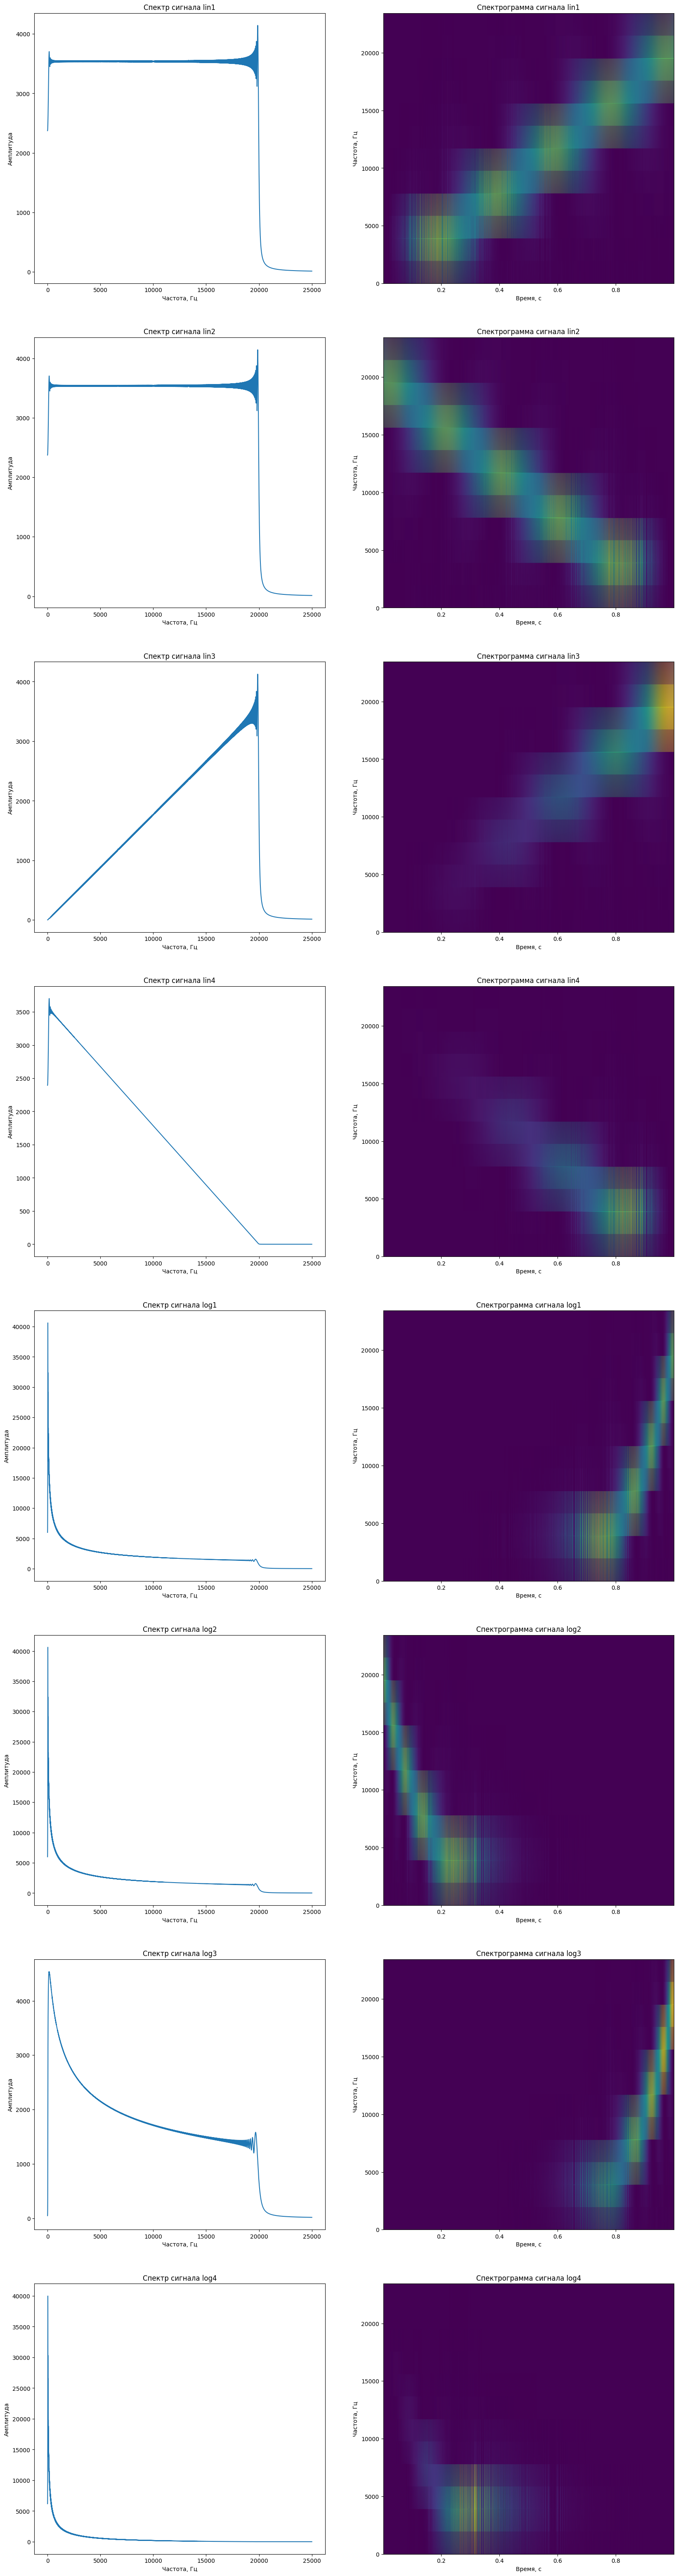

In [36]:
signals = [signal_lin1, signal_lin2, signal_lin3, signal_lin4, signal_log1, signal_log2, signal_log3, signal_log4]
plot_signal_properties(signals, max_freq=25_000.0)

# Преобразованный сигнал lin1

In [63]:
signal_scheme1_log2_x1 = Signal.load_from_csv(Path(r"..\data\scheme1\log2_x1.csv"))

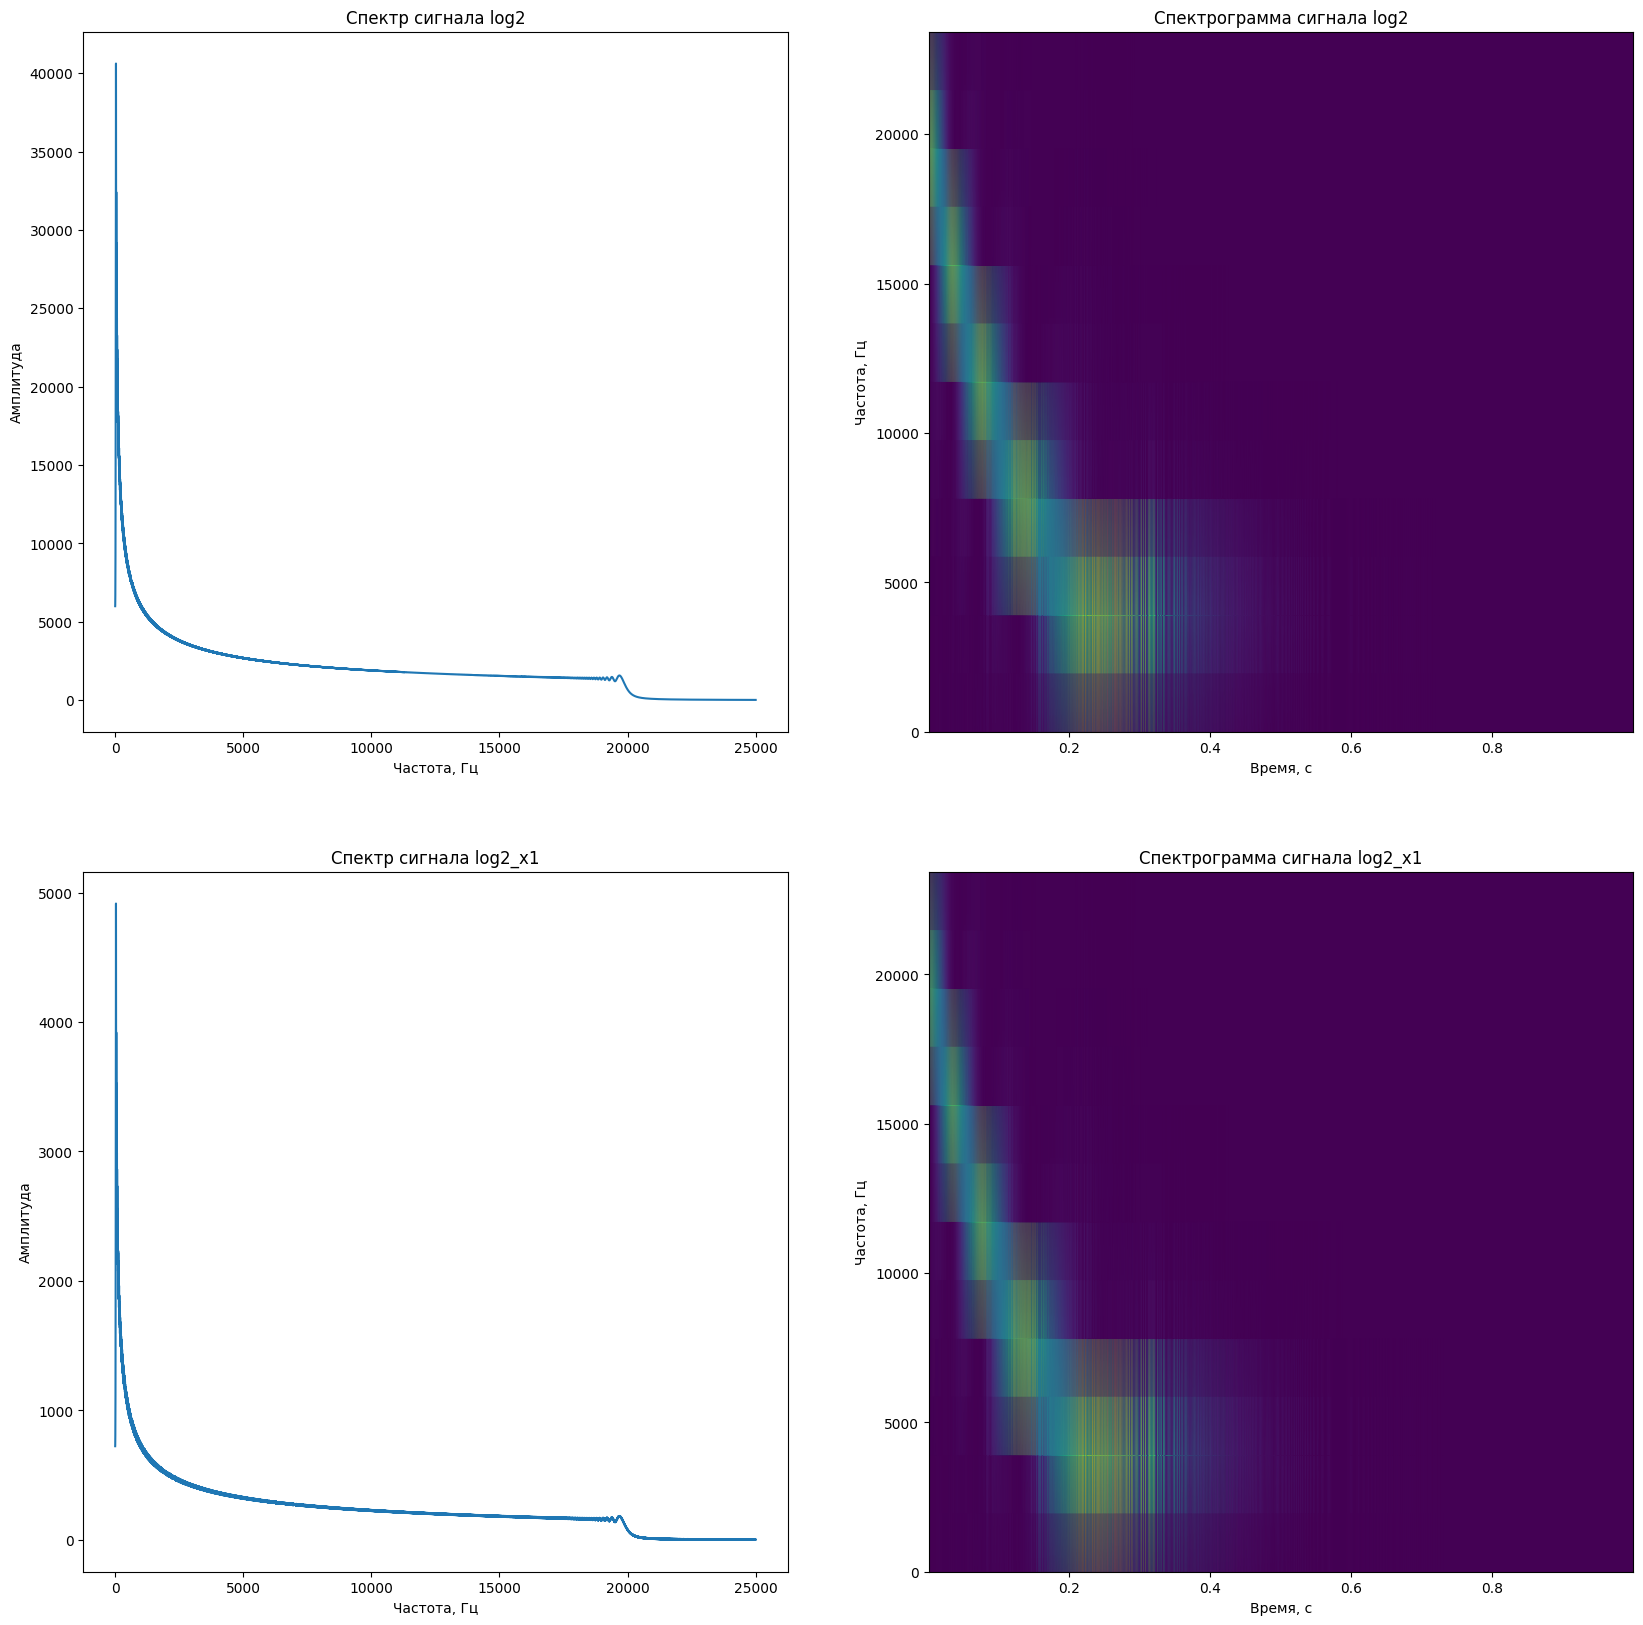

In [64]:
signals = [signal_log2, signal_scheme1_log2_x1]
plot_signal_properties(signals, max_freq=25_000.0)

# Вывод формы исходного сигнала log2 и преообразованнного схемой 1

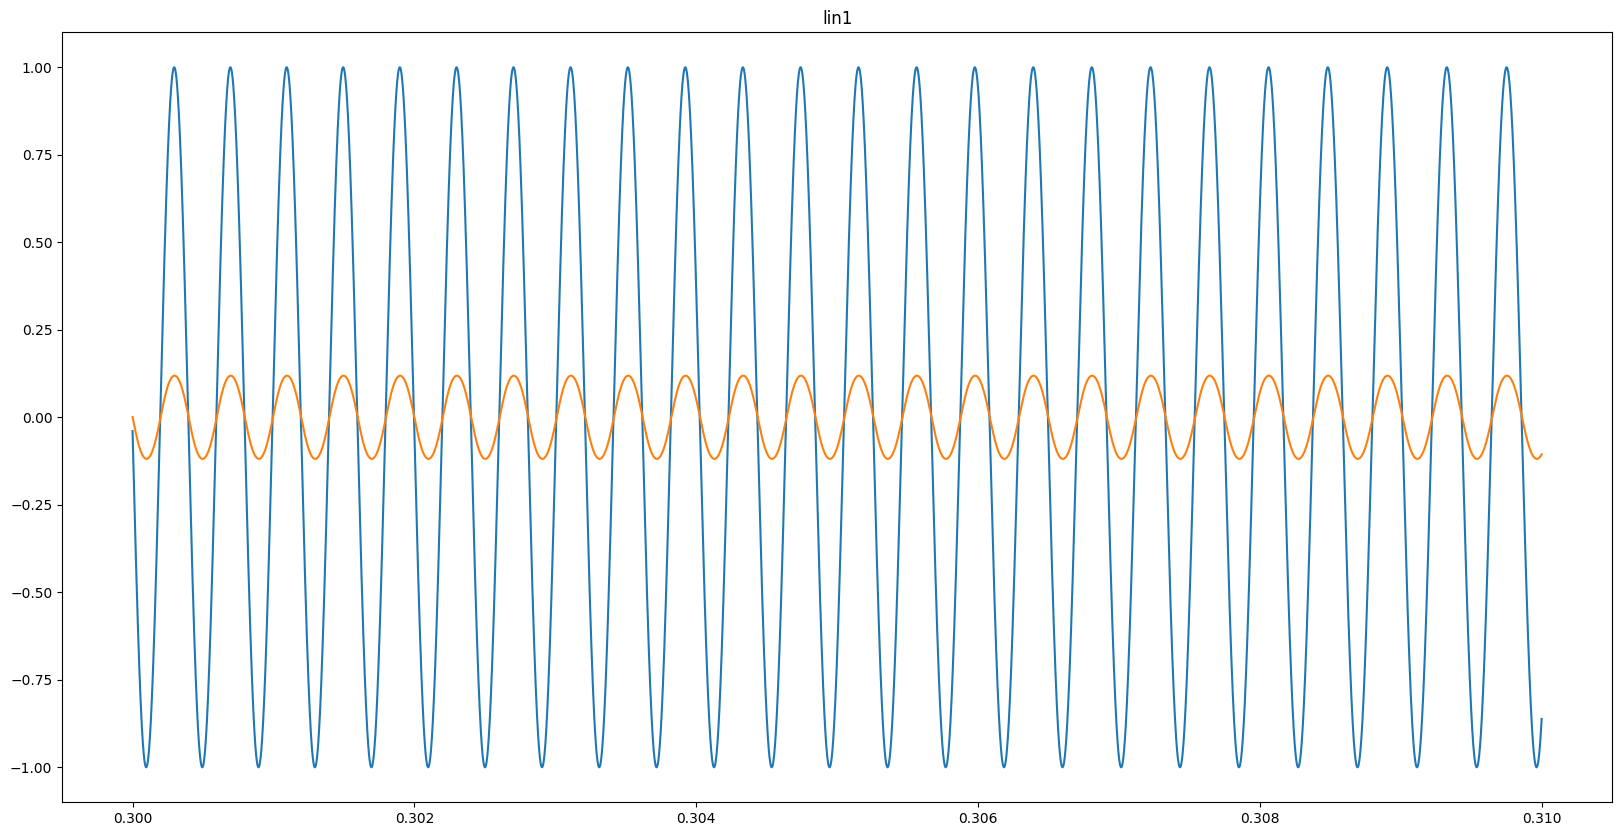

In [66]:
t0 = 0.3
t1 = 0.31
plt.figure(figsize=(20, 10))
for s in signals:
    _s = s.cut(t0, t1)
    plt.plot(_s.t, _s.values)
plt.title("lin1")
plt.show()

# Зависимость в схеме 1 U(x1)

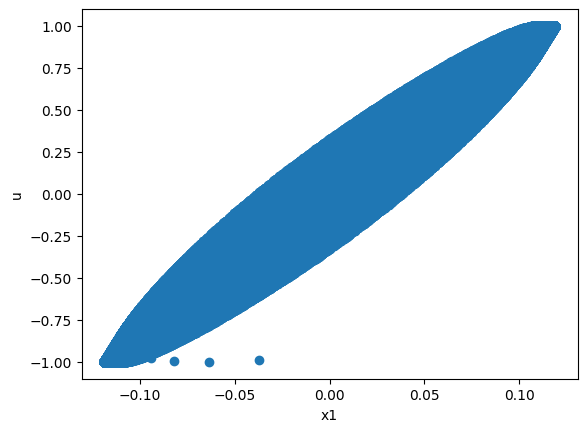

In [68]:
plt.plot(signal_scheme1_log2_x1.values, signal_log2.values, "o")
plt.ylabel('u')
plt.xlabel('x1')
plt.show()

In [69]:
signal_scheme2_log2_x1 = Signal.load_from_csv(Path(r"..\data\scheme2\log2_x1.csv"))
signal_scheme2_log2_x2 = Signal.load_from_csv(Path(r"..\data\scheme2\log2_x2.csv"))

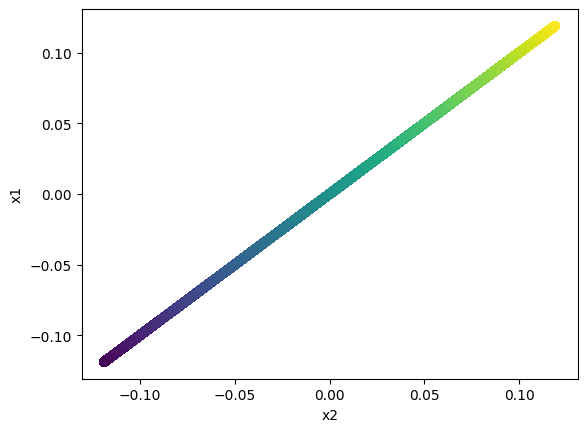

In [70]:
plt.scatter(signal_scheme2_log2_x1.values, signal_scheme2_log2_x2.values, c=signal_log2.values)
plt.ylabel('x1')
plt.xlabel('x2')
plt.show()